# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [23]:
df = pd.read_csv("D:\Machine Learning\Data\Employee.csv")

In [5]:
df_backup = df.copy()

# Data Exploration

In [6]:
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [9]:
df.tail()

,Company,Age,Salary,Place,Country,Gender
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1
147,Infosys,22.0,8202.0,Cochin,India,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [16]:
df.duplicated

<bound method DataFrame.duplicated of      Company   Age  Salary     Place Country  Gender
0        TCS  20.0     NaN   Chennai   India       0
1    Infosys  30.0     NaN    Mumbai   India       0
2        TCS  35.0  2300.0  Calcutta   India       0
3    Infosys  40.0  3000.0     Delhi   India       0
4        TCS  23.0  4000.0    Mumbai   India       0
..       ...   ...     ...       ...     ...     ...
143      TCS  33.0  9024.0  Calcutta   India       1
144  Infosys  22.0  8787.0  Calcutta   India       1
145  Infosys  44.0  4034.0     Delhi   India       1
146      TCS  33.0  5034.0    Mumbai   India       1
147  Infosys  22.0  8202.0    Cochin   India       0

[148 rows x 6 columns]>

### Unique values in each feature

In [39]:
unique_value = {}

for col in df.columns:
   unique_values = df[col].unique()
   unique_count = len(unique_values)
   unique_value[col] = {
        "Unique_values" : unique_values,
        "Unique_count" : unique_count
    }

for col, details in unique_value.items() :
    print("Column Name : ", col)
    print("Unique values : ", details['Unique_values'])
    print("Count : ", details['Unique_count'])
    print('\n')
    

    
    
    


Column Name :  Company
Unique values :  ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Count :  7


Column Name :  Age
Unique values :  [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Count :  30


Column Name :  Salary
Unique values :  [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Count :  41


Column Name :  Place
Unique values :  ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Count :  12


Column Name :  Country
Unique values :  ['India']
Count :  1


Column Name :  Gender
Unique values :  [0 1]
Count :  2




### Statistical Analysis

In [40]:
df.describe()   ## overall description

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [44]:
df.describe().T.round(2)    ## description of numerical features

,count,mean,std,min,25%,50%,75%,max
Age,130.0,30.48,11.10,0.0,22.0,32.5,37.75,54.0
Salary,124.0,5312.47,2573.76,1089.0,3030.0,5000.0,8000.00,9876.0
Gender,148.0,0.22,0.42,0.0,0.0,0.0,0.00,1.0


In [45]:
df.describe(include=object)    ## description of categorical features

,Company,Place,Country
count,140,134,148
unique,6,11,1
top,TCS,Mumbai,India
freq,53,37,148


### Renaming of Columns

In [49]:
df.rename(columns={
    "Company" : "Company Name",
    "Place" : "Region",
},inplace=True)

df.head()

,Company Name,Age,Salary,Region,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


# Data Cleaning

### Finding missing and inappropriate values and handle

In [53]:
print("Missing values count:")
df.isnull().sum()

Missing values :


Company Name     8
Age             18
Salary          24
Region          14
Country          0
Gender           0
dtype: int64

In [54]:
df.dropna(subset=['Company Name'],inplace = True)

In [58]:
df['Age'].fillna("NAN",inplace=True)

In [59]:
df['Salary'].fillna(df['Salary'].mean(),inplace=True)

In [63]:
df['Region'].fillna(df['Region'].mode()[0],inplace=True)

In [64]:
df.isnull().sum()

Company Name    0
Age             0
Salary          0
Region          0
Country         0
Gender          0
dtype: int64

### Remove Duplicate rows

In [66]:
df.duplicated().sum()

4

In [70]:
df.drop_duplicates(inplace = True)

In [71]:
df.duplicated().sum()

0

### Find Outliers

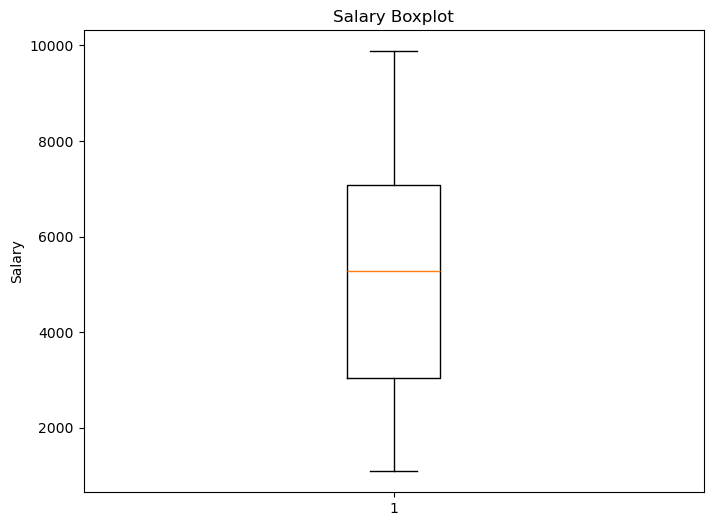

In [72]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Salary'])
plt.title('Salary Boxplot')
plt.ylabel('Salary')
plt.show()

In [73]:
df['Salary'].skew()

0.20824384525217676

C:\Users\joncy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


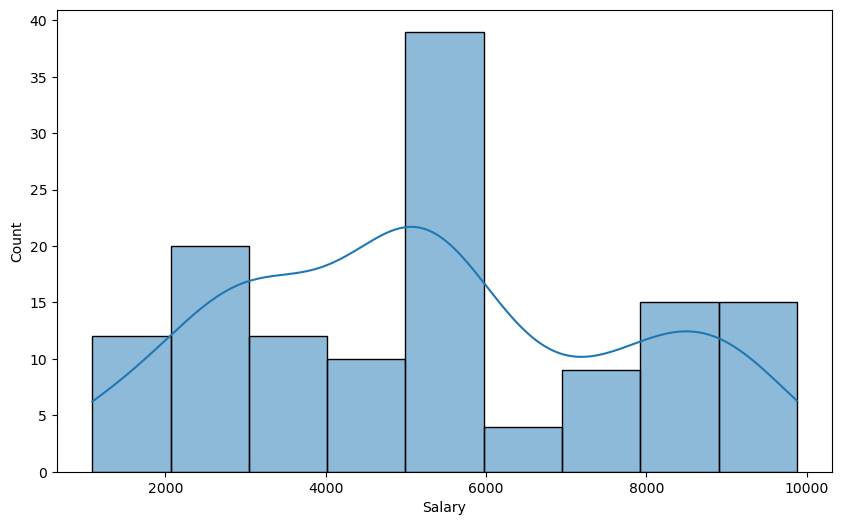

In [74]:
plt.figure(figsize=(10,6))
sns.histplot(df['Salary'],kde=True)
plt.show()

# Data Analysis

### Data with age >40 and salary<5000

In [82]:
df['Age'] = pd.to_numeric(df['Age'],errors='coerce')

In [84]:
print(df.loc[(df.Age>40) & (df.Salary<5000)])

    Company Name   Age  Salary     Region Country  Gender
21       Infosys  50.0  3184.0      Delhi   India       0
32       Infosys  45.0  4034.0   Calcutta   India       0
39       Infosys  41.0  3000.0     Mumbai   India       0
50       Infosys  41.0  3000.0    Chennai   India       0
57       Infosys  51.0  3184.0  Hyderabad   India       0
68       Infosys  43.0  4034.0     Mumbai   India       0
75       Infosys  44.0  3000.0     Cochin   India       0
86       Infosys  41.0  3000.0      Delhi   India       0
93       Infosys  54.0  3184.0     Mumbai   India       0
104      Infosys  44.0  4034.0      Delhi   India       0
122      Infosys  44.0  3234.0     Mumbai   India       0
129      Infosys  50.0  3184.0   Calcutta   India       0
138          CTS  44.0  3033.0     Cochin   India       0
140      Infosys  44.0  4034.0  Hyderabad   India       0
145      Infosys  44.0  4034.0      Delhi   India       1


In [85]:
### Chart age with salary

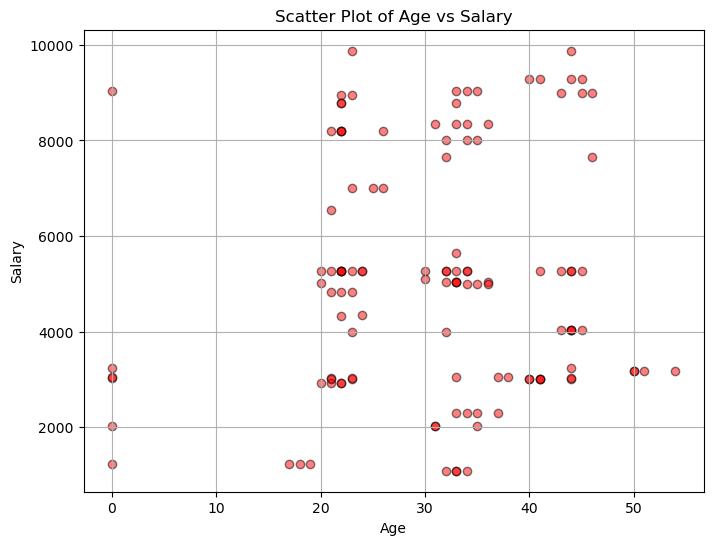

In [87]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Salary'], alpha=0.5, color='red', edgecolor='k')
plt.title('Scatter Plot of Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

In [91]:
unique_value['Place']

{'Unique_values': array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
        nan, 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'],
       dtype=object),
 'Unique_count': 12}

### No. of people from each place

In [100]:
People_count = (df['Region'].value_counts())
People_count

Region
Mumbai        46
Calcutta      30
Chennai       13
Delhi         13
Cochin        13
Noida          7
Hyderabad      7
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64

<Axes: ylabel='Region'>

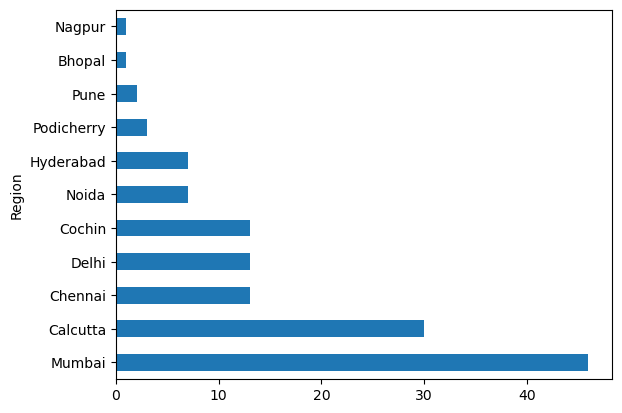

In [101]:
df['Region'].value_counts().plot(kind='barh')

# Data Encoding

## Label Encoding

In [103]:
from sklearn.preprocessing import LabelEncoder

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136 entries, 0 to 147
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  136 non-null    object 
 1   Age           121 non-null    float64
 2   Salary        136 non-null    float64
 3   Region        136 non-null    object 
 4   Country       136 non-null    object 
 5   Gender        136 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.4+ KB


#### Country

In [109]:
label = LabelEncoder()
df['Country label_encode']=label.fit_transform(df['Country'])

#### Region

In [116]:
df['Region label_encode'] = label.fit_transform(df['Region'])
df.head()

,Company Name,Age,Salary,Region,Country,Gender,Country labelencode,Region labelencode,Country label_encode,Region label_encode
0,TCS,20.0,5276.159664,Chennai,India,0,0,2,0,2
1,Infosys,30.0,5276.159664,Mumbai,India,0,0,6,0,6
2,TCS,35.0,2300.000000,Calcutta,India,0,0,1,0,1
3,Infosys,40.0,3000.000000,Delhi,India,0,0,4,0,4
4,TCS,23.0,4000.000000,Mumbai,India,0,0,6,0,6


## One hot Encoding

#### Company Name

In [117]:
one_hot_endcoding = pd.get_dummies(df['Company Name'],drop_first=False)
one_hot_endcoding.astype(int)

,CTS,Congnizant,Infosys,Infosys Pvt Lmt,TCS,Tata Consultancy Services
0,0,0,0,0,1,0
1,0,0,1,0,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
142,0,0,0,1,0,0
143,0,0,0,0,1,0
145,0,0,1,0,0,0
146,0,0,0,0,1,0


# Feature Scaling

In [120]:
from sklearn.preprocessing import  StandardScaler, MinMaxScaler

#### Standard Scaling

In [121]:
standard_scaler = StandardScaler()
df_data = df.drop(['Company Name','Region','Country'],axis=1)
df_data.head()
standard_scaler.fit(df_data)


df_standard = standard_scaler.transform(df_data)
df_standard_new = pd.DataFrame(df_standard,columns=df_data.columns)
df_standard_new.head()

,Age,Salary,Gender,Country labelencode,Region labelencode,Country label_encode,Region label_encode
0,-0.948439,0.011215,-0.543358,0.0,-0.894166,0.0,-0.894166
1,-0.060882,0.011215,-0.543358,0.0,0.749166,0.0,0.749166
2,0.382896,-1.243634,-0.543358,0.0,-1.304999,0.0,-1.304999
3,0.826675,-0.948491,-0.543358,0.0,-0.072500,0.0,-0.072500
4,-0.682172,-0.526857,-0.543358,0.0,0.749166,0.0,0.749166


#### MinMax Scaling

In [124]:
minmax_scaler = MinMaxScaler()

data_minmax = minmax_scaler.fit_transform(df_data)
data_minmax_new = pd.DataFrame(data_minmax,columns=df_data.columns)
data_minmax_new.head()

,Age,Salary,Gender,Country labelencode,Region labelencode,Country label_encode,Region label_encode
0,0.370370,0.476518,0.0,0.0,0.2,0.0,0.2
1,0.555556,0.476518,0.0,0.0,0.6,0.0,0.6
2,0.648148,0.137817,0.0,0.0,0.1,0.0,0.1
3,0.740741,0.217480,0.0,0.0,0.4,0.0,0.4
4,0.425926,0.331285,0.0,0.0,0.6,0.0,0.6
